Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

# Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from xgboost import XGBClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df=pd.read_excel('glass.xlsx', sheet_name='glass')
df.head(10)

RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1

# 1. Exploratory Data Analysis (EDA):

In [5]:
df.shape

(214, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Data Visualization:

In [10]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

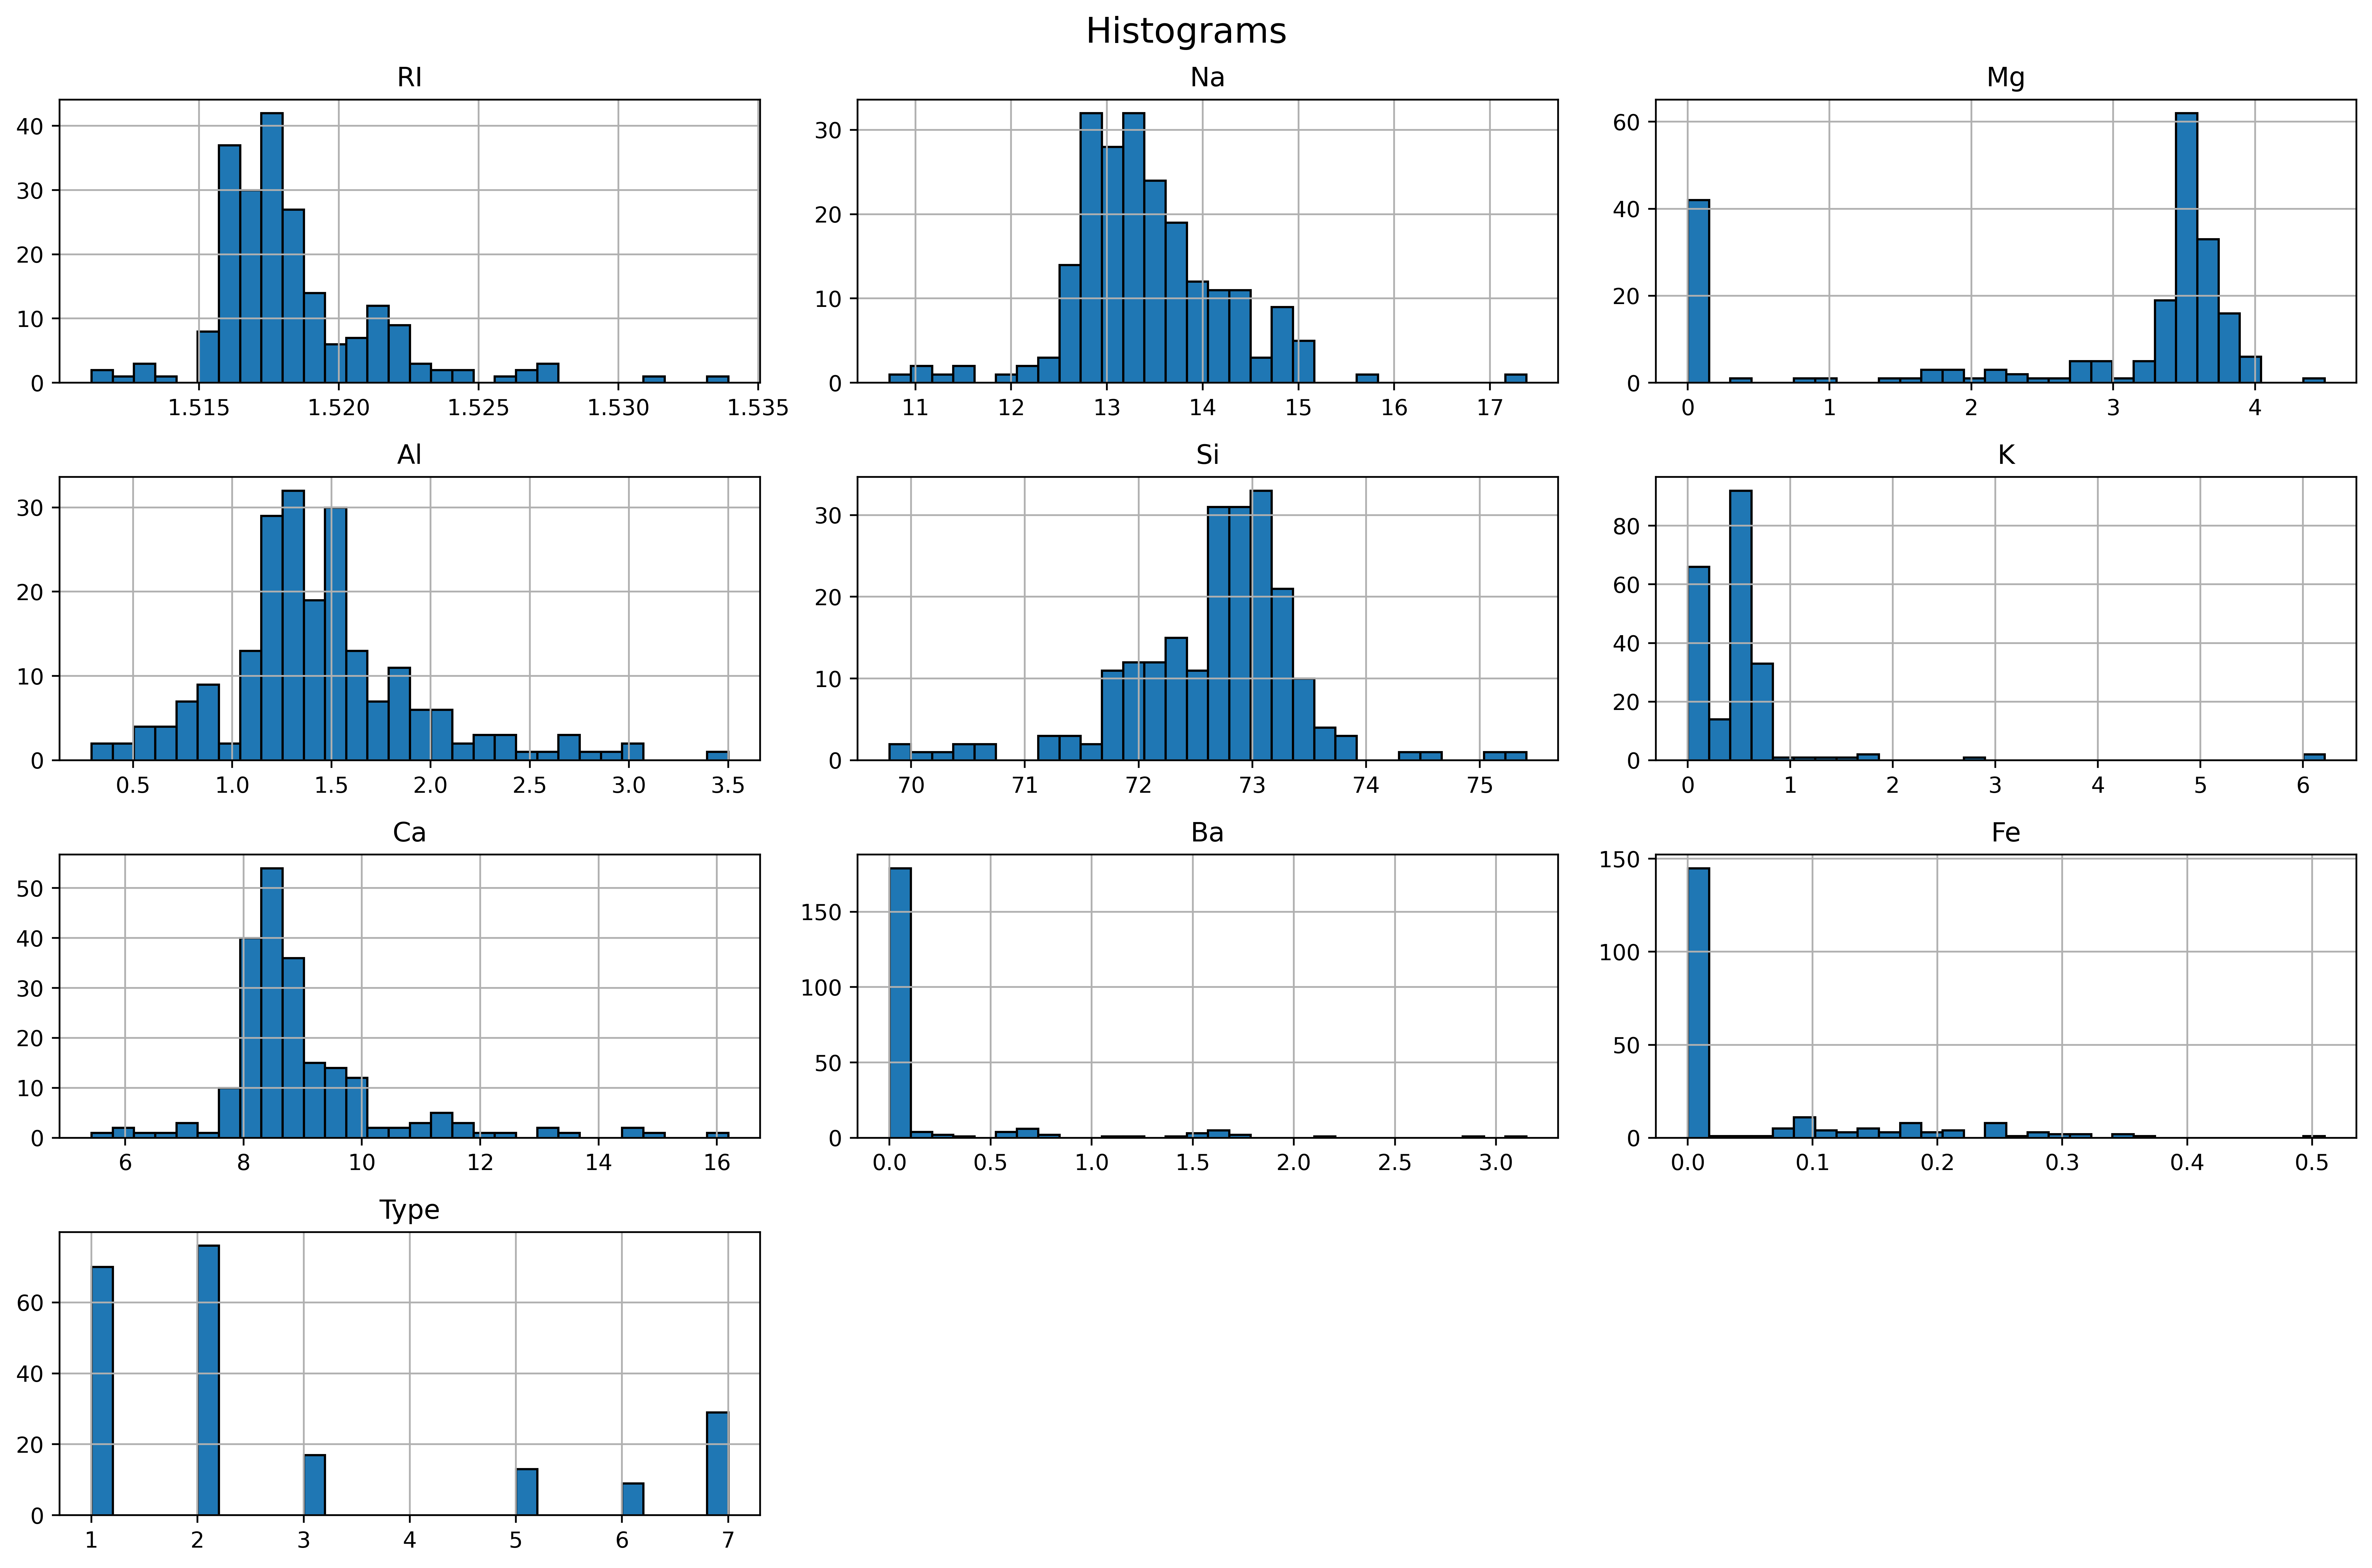

In [9]:
#Histogram

df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms', fontsize=16)
plt.tight_layout()
plt.show()


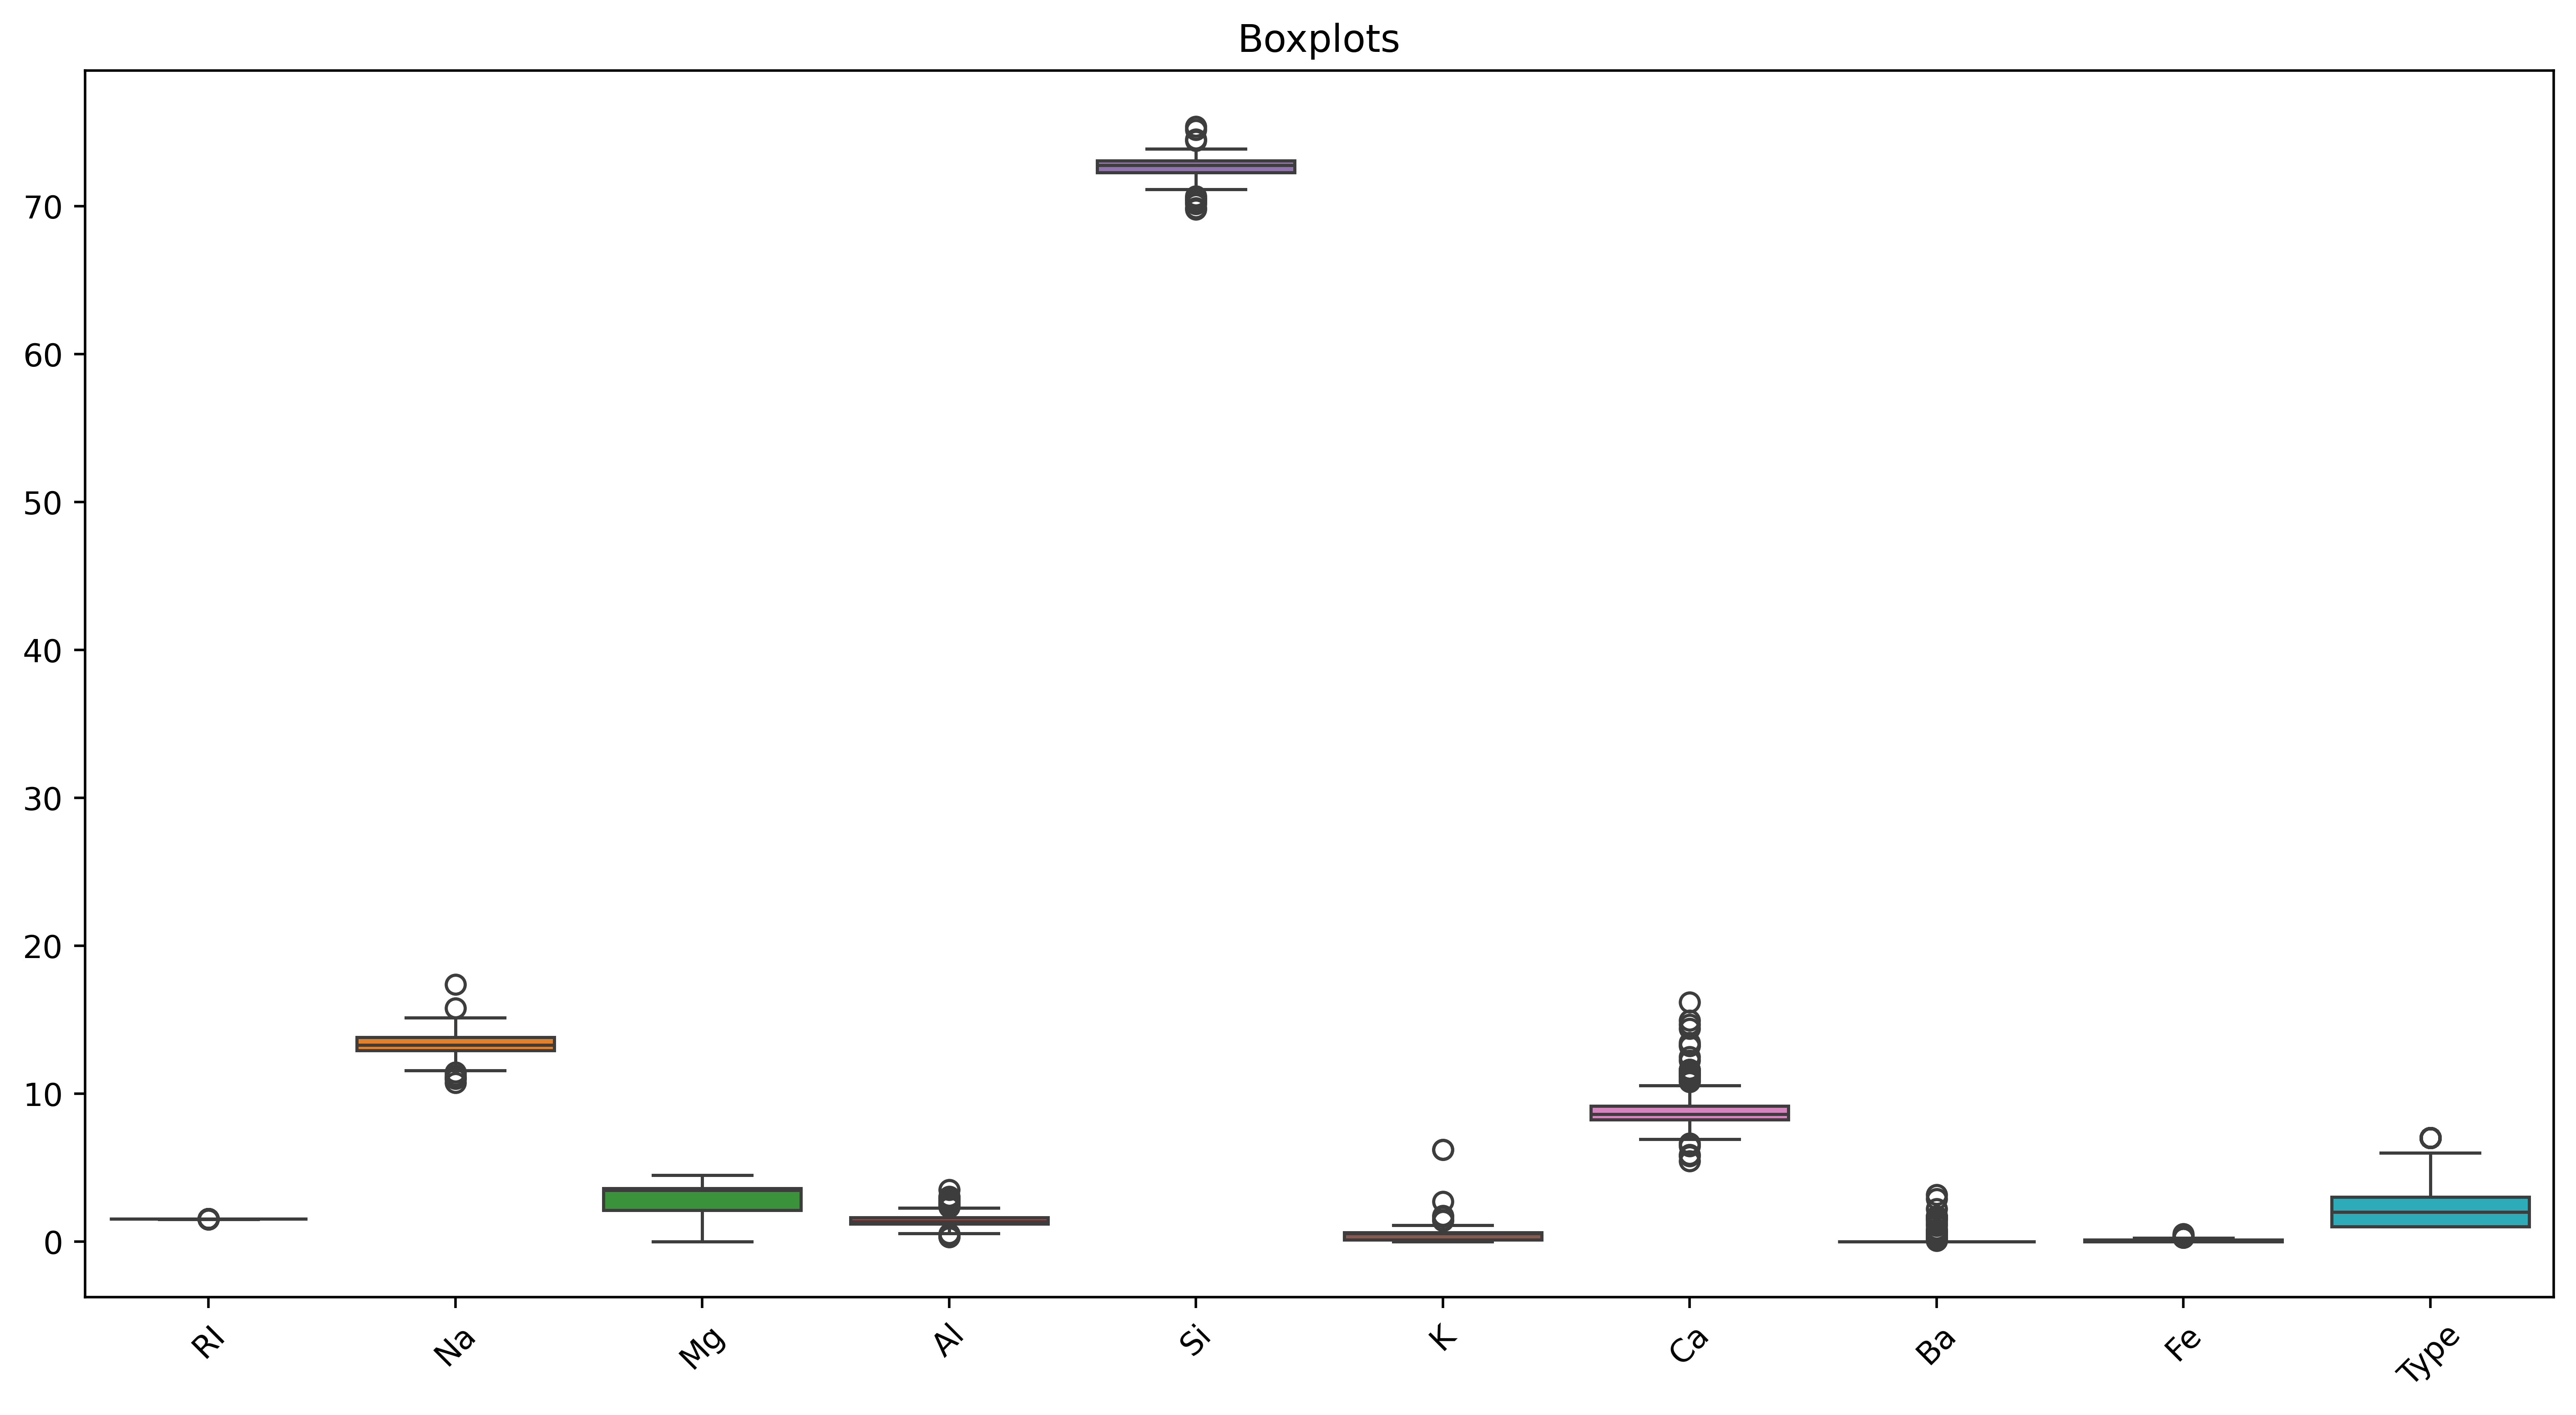

In [11]:
# 2. Boxplots for numerical features
plt.figure(figsize=(14, 7))
sns.boxplot(data=df)
plt.title('Boxplots')
plt.xticks(rotation=45)
plt.show()



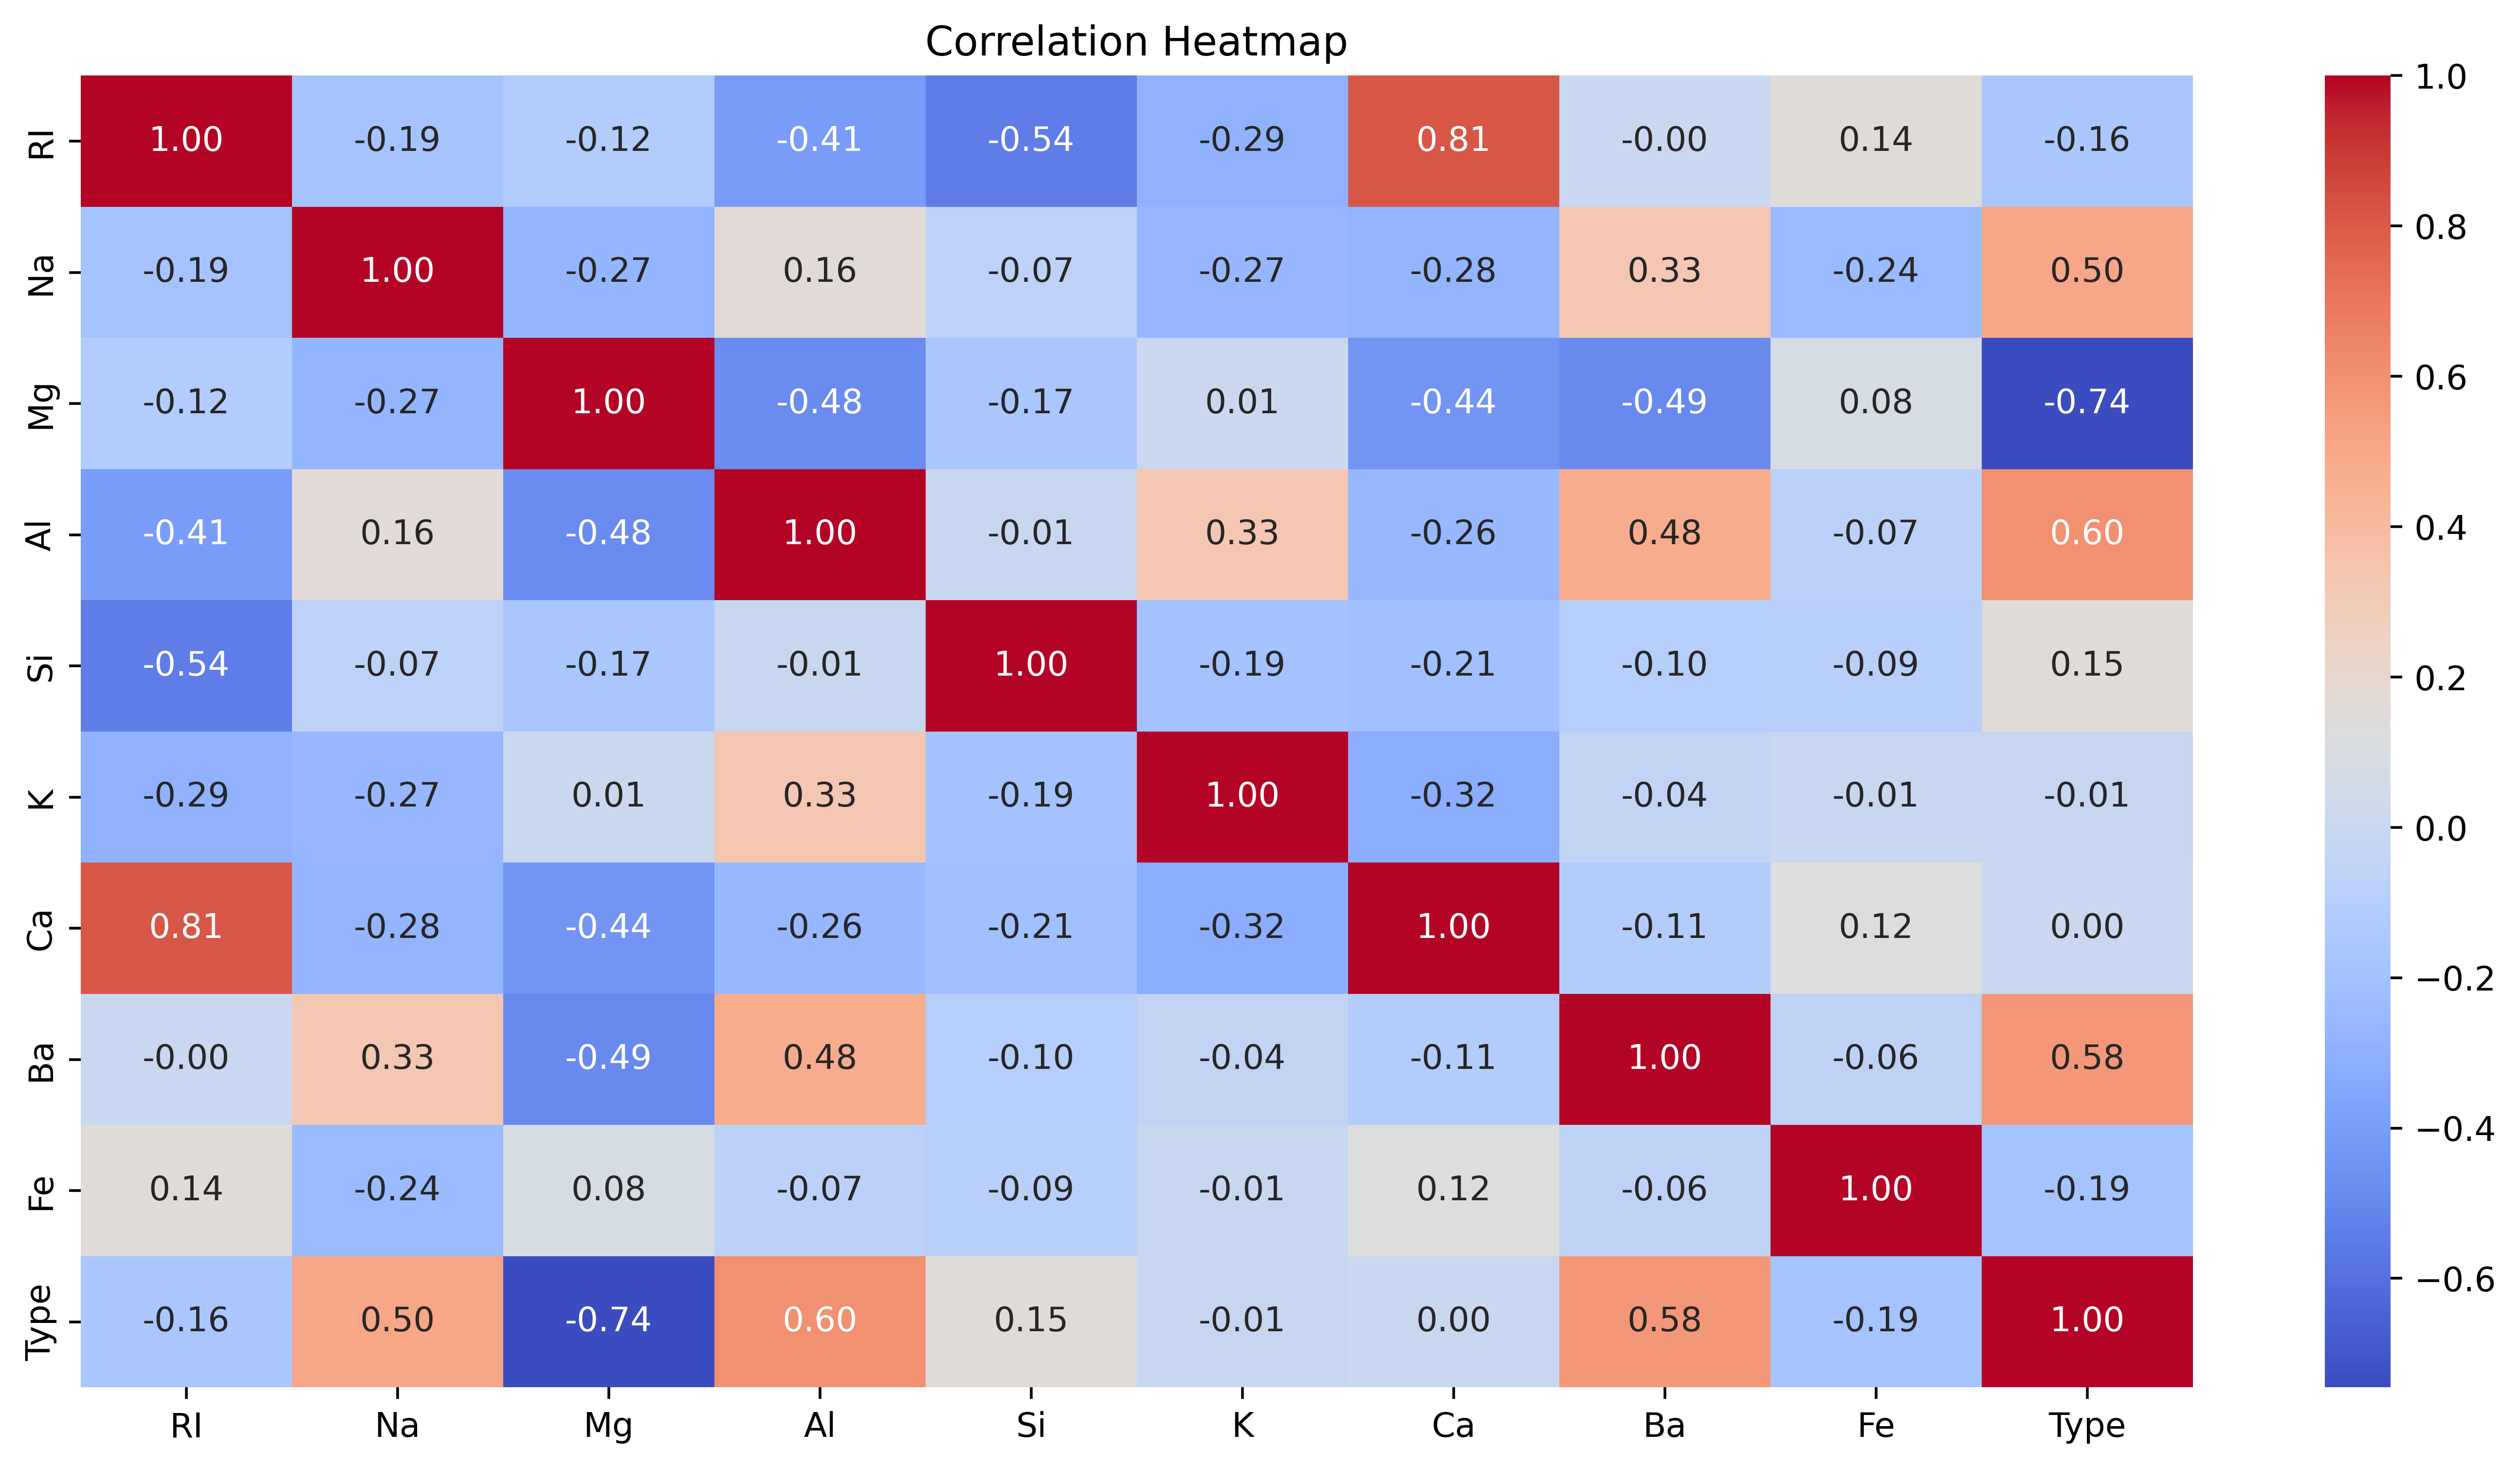

In [12]:
# correlation heatmap
plt.figure(figsize=(14,7))
corr=df.corr()
sns. heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
sns.pairplot(df)
plt.show()

# Data Preprocessing

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count of outliers per column
print(outliers.sum())


RI      17
Na       7
Mg       0
Al      18
Si      12
K        7
Ca      26
Ba      38
Fe      12
Type    29
dtype: int64


 Note: We do NOT include 'Type' in outlier treatment because it is the target/output column.
 Outlier detection and capping are only applied to input features (independent variables).
 Modifying the target column would corrupt the true class labels and affect model training.


In [ ]:
# Capping function using IQR
def cap_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[columns].clip(lower_bound, upper_bound, axis=1)

# Apply capping
columns_to_cap = ['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'] #these are the columns where outliers were found (except Mg and Type).
df[columns_to_cap] = cap_outliers(df, columns_to_cap)


In [15]:
df[columns_to_cap] = cap_outliers(df, columns_to_cap)


NameError: name 'cap_outliers' is not defined

In [16]:
from sklearn.preprocessing import StandardScaler

# Select features (exclude the target column 'Type')
X = df.drop("Type", axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



In [ ]:
X_scaled

# Train-Test split

In [ ]:
X = df.drop("Type", axis=1)
Y=df['Type']

# Implimenting Random-Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3, random_state=1)


In [128]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypredict = rfc.predict(xtest)

In [129]:
ypredict

array([6, 7, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 7,
       7, 1, 2, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 1, 3, 3, 2, 1, 1, 7, 7, 1,
       7, 1, 1, 1, 2, 7, 1, 1, 2, 2, 5, 2, 7, 1, 2, 7, 2, 2, 2, 2, 1])

In [130]:

print(classification_report(ytest,ypredict))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85        25
           2       0.85      0.81      0.83        21
           3       0.67      0.29      0.40         7
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       0.89      0.89      0.89         9

    accuracy                           0.82        65
   macro avg       0.78      0.82      0.77        65
weighted avg       0.81      0.82      0.80        65



In [ ]:
len(rfc.estimators_)

In [ ]:
X.columns

In [ ]:
tree.plot_tree(
    rfc.estimators_[75],
    feature_names=X.columns,
    class_names=[str(cls) for cls in df['Type'].unique()],
    filled=True,
    max_depth=3
)
plt.show()


# Bagging / Boosting

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [118]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode labels
le = LabelEncoder()
ytrain_encoded = le.fit_transform(ytrain)
ytest_encoded = le.transform(ytest)

# Step 2: Define general prediction function for encoded labels
def prediction_encoded(model):
    model.fit(xtrain, ytrain_encoded)
    yp = model.predict(xtest)
    print(f"Train Accuracy: {model.score(xtrain, ytrain_encoded)}")
    print(f"Test Accuracy: {model.score(xtest, ytest_encoded)}")
    print(classification_report(ytest_encoded, yp))


In [119]:
prediction(RandomForestClassifier()) # RandomForest

Train Accuracy: 1.0
Test Accuracy: 0.8153846153846154
              precision    recall  f1-score   support

           1       0.82      0.92      0.87        25
           2       0.81      0.81      0.81        21
           3       0.67      0.29      0.40         7
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       0.89      0.89      0.89         9

    accuracy                           0.82        65
   macro avg       0.78      0.82      0.77        65
weighted avg       0.81      0.82      0.80        65



In [120]:
prediction(GradientBoostingClassifier())

Train Accuracy: 1.0
Test Accuracy: 0.8153846153846154
              precision    recall  f1-score   support

           1       0.77      0.96      0.86        25
           2       0.90      0.90      0.90        21
           3       0.00      0.00      0.00         7
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         1
           7       0.89      0.89      0.89         9

    accuracy                           0.82        65
   macro avg       0.68      0.71      0.69        65
weighted avg       0.74      0.82      0.78        65



In [122]:
prediction_encoded(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))


Train Accuracy: 1.0
Test Accuracy: 0.8615384615384616
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.83      0.90      0.86        21
           2       0.75      0.43      0.55         7
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         1
           5       0.90      1.00      0.95         9

    accuracy                           0.86        65
   macro avg       0.89      0.79      0.82        65
weighted avg       0.86      0.86      0.85        65



In [123]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [124]:
params = {
    'n_estimators' : [90,110,160],
    'learning_rate' : [0.1,0.3,0.7],
    'max_depth' : [2,4,6,8]
}

In [125]:
grid = GridSearchCV(GradientBoostingClassifier(), params, verbose=1)#verbose 

grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.7],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [90, 110, 160]},
             verbose=1)

In [132]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 160}

In [133]:
prediction(GradientBoostingClassifier(learning_rate=0.1, max_depth=4, n_estimators=160))

Train Accuracy: 1.0
Test Accuracy: 0.8307692307692308
              precision    recall  f1-score   support

           1       0.82      0.92      0.87        25
           2       0.86      0.86      0.86        21
           3       0.67      0.29      0.40         7
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      0.89      0.94         9

    accuracy                           0.83        65
   macro avg       0.81      0.83      0.79        65
weighted avg       0.83      0.83      0.82        65



# Bagging vs Boosting

 Bagging (Bootstrap Aggregating):
It trains multiple models independently using random subsets of the training data (with replacement).
 Final prediction is made by majority voting (for classification) or averaging (for regression).
 Reduces variance and helps prevent overfitting.
 Example: Random Forest (uses Decision Trees + Bagging)

 Boosting:
Trains models sequentially where each model tries to correct the errors of the previous one.
 Models are trained on weighted data, focusing more on difficult-to-predict examples.
Reduces bias and can achieve higher accuracy but is more prone to overfitting if not tuned well.
Examples: AdaBoost, Gradient Boosting, XGBoost


# Handle imbalanced data

 Handling Imbalanced Data:
 Class imbalance occurs when one class significantly outnumbers others.
 It can bias the model towards the majority class.

     
 1.Techniques to handle imbalance:
 Resampling:
  - Undersampling: Reduce the size of majority class.
  - Oversampling: Increase the size of minority class (e.g. using SMOTE).
 2. Use Class Weights:
   - Assign higher weight to minority class during training.
   - Many classifiers like LogisticRegression, RandomForest, and XGBoost support this.
3. Evaluation Metrics:
  - Use precision, recall, F1-score, ROC-AUC instead of just accuracy.
4. Ensemble Methods:
   - Boosting methods like XGBoost can be effective with imbalanced data when using `scale_pos_weight` or custom objective.

 Example:
model = XGBClassifier(scale_pos_weight = ratio_of_majority_to_minority)
